### Fastfood 영양 데이터를 알아보기

- https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fastfood = pd.read_csv('../data/fastfood/fastfood.csv')

fastfood.head(5)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


- Fastfood 가게 종류, 메뉴, 칼로리, 지방칼로리, 총지방량, 포화지방, 트렌스지방, 콜레스테롤, 염분, 총 탄수화물량, 섬유질, 당분, 단백질, 비타민A, 비타민C 칼슘 으로 이루어져있다.
- salad는 필요없는 수치

## Tasks
- 가게와 영양성분의 상관관계를 알아보기
1. 가게별로 메뉴가 몇 개 있는지 알아보기
2. 칼로리를 덜 섭취하고 싶을 때 어디서 먹는게 제일 좋은지
3. 단백질을 잘 섭취하고 싶을 때 어디서 먹는게 제일 좋은지
4. 탄수화물을 섭취해야하는데 단당류 비율이 적은 복합탄수화물이 먹고싶을 때

In [27]:
#결측치 알아보기

fastfood.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

- 비타민, 칼슘량, 섬유질양에 대해서 결측치가 있음
- 단백질 결측치는 단 1개이지만 중요한 수치니깐 고려해보자

In [28]:
fastfood.corr()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
calories,1.000000,0.901661,0.900494,0.739664,0.530354,0.762460,0.817855,0.712701,0.287031,0.437711,0.831957,-0.153963,0.007387,0.351207
cal_fat,0.901661,1.000000,0.995311,0.852150,0.648422,0.803997,0.670458,0.419373,0.032643,0.255485,0.720379,-0.121748,-0.115456,0.166801
total_fat,0.900494,0.995311,1.000000,0.846716,0.648821,0.801352,0.669182,0.422543,0.036386,0.259370,0.719518,-0.122280,-0.112868,0.168817
sat_fat,0.739664,0.852150,0.846716,1.000000,0.812126,0.764030,0.487456,0.276534,-0.041220,0.234218,0.603645,-0.054292,-0.088834,0.304948
trans_fat,0.530354,0.648422,0.648821,0.812126,1.000000,0.680858,0.261466,0.100284,-0.121890,0.112651,0.478960,-0.086352,-0.141754,0.114094
cholesterol,0.762460,0.803997,0.801352,0.764030,0.680858,1.000000,0.596164,0.238728,-0.061503,0.298259,0.880960,-0.057142,-0.015610,0.162438
sodium,0.817855,0.670458,0.669182,0.487456,0.261466,0.596164,1.000000,0.671976,0.301023,0.422993,0.766942,-0.134031,0.062994,0.284882
total_carb,0.712701,0.419373,0.422543,0.276534,0.100284,0.238728,0.671976,1.000000,0.648839,0.547026,0.474396,-0.187004,0.128177,0.514463
fiber,0.287031,0.032643,0.036386,-0.041220,-0.121890,-0.061503,0.301023,0.648839,1.000000,0.236475,0.148053,0.157631,0.491224,0.546734
sugar,0.437711,0.255485,0.259370,0.234218,0.112651,0.298259,0.422993,0.547026,0.236475,1.000000,0.389959,0.001626,0.229223,0.310559


- 상관관계를 봤을 때 지방과 칼로리의 관계가 눈에 띈다.
- 염분과 단백질 또한 칼로리와 연관성이 있어보인다.

In [29]:
fastfood.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


## 가게별로 메뉴가 몇 개 있는지 알아보기

In [30]:
fastfood['restaurant'].value_counts()

Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: restaurant, dtype: int64

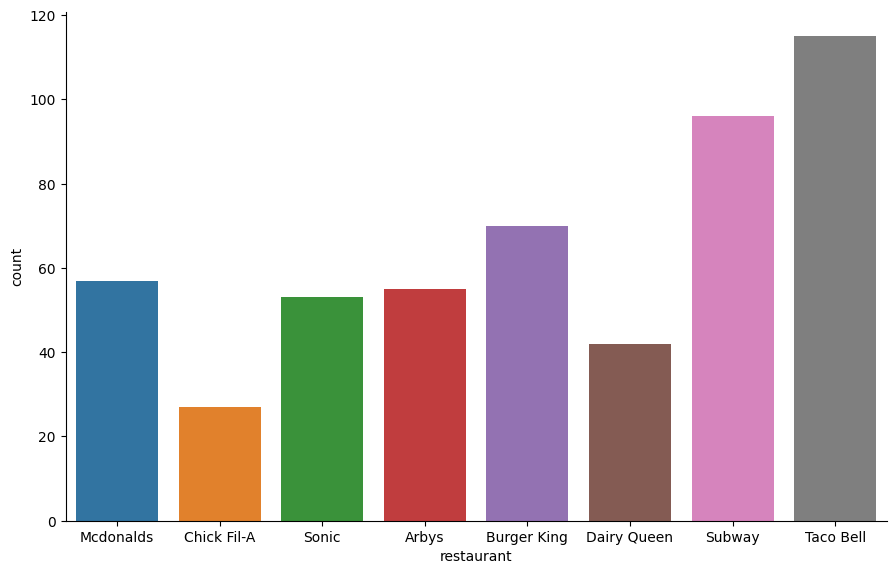

In [31]:
fig = sns.catplot(x='restaurant', kind='count', data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- 다채롭게 먹고싶으면 타코벨로 가자

## 칼로리를 덜 섭취하고 싶을 때 어디서 먹는게 제일 좋은지

In [32]:
# 식당에서 칼로리의 평균값을 구해보기

cal_mean_res = fastfood[['calories','restaurant']].groupby(['restaurant']).mean()

cal_mean_res

,calories
restaurant,
Arbys,532.727273
Burger King,608.571429
Chick Fil-A,384.444444
Dairy Queen,520.238095
Mcdonalds,640.350877
Sonic,631.698113
Subway,503.020833
Taco Bell,443.652174


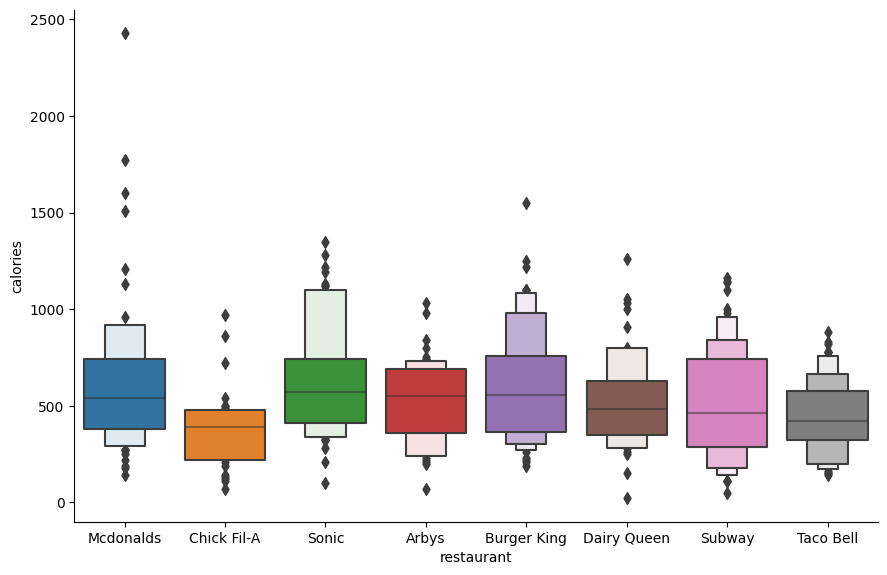

In [33]:
fig = sns.catplot(x='restaurant', y='calories', kind="boxen",data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- Chick Fil-A라는 곳이 칼로리가 낮은 것을 알 수 있음
- 타코벨이 주변에 있으면 한국에서는 좋은 선택이 될 것 같음

## 단백질을 잘 섭취하고 싶을 때 어디서 먹는게 제일 좋은지


In [34]:
# 단백질의 결손치가 있었는데 결손치가 나온 식당을 찾아보기

fastfood['restaurant'][fastfood['protein'].isnull()]

205    Burger King
Name: restaurant, dtype: object

In [35]:
# Buger King의 protein mean값을 넣어주기
protein_mean_buggerking = fastfood['protein'][fastfood['restaurant']=='Burger King'].mean()

fastfood[fastfood['protein'].isnull()].fillna(protein_mean_buggerking)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
205,Burger King,Farmhouse King,1220,720,80,28.0,3.0,335,2050,62,30.014493,15,30.014493,30.014493,30.014493,30.014493,Other


In [36]:
# 식당에서 단백질의 평균값을 구해보기

prot_mean_res = fastfood[['protein','restaurant']].groupby(['restaurant']).mean()

prot_mean_res

,protein
restaurant,
Arbys,29.254545
Burger King,30.014493
Chick Fil-A,31.703704
Dairy Queen,24.833333
Mcdonalds,40.298246
Sonic,29.188679
Subway,30.312500
Taco Bell,17.417391


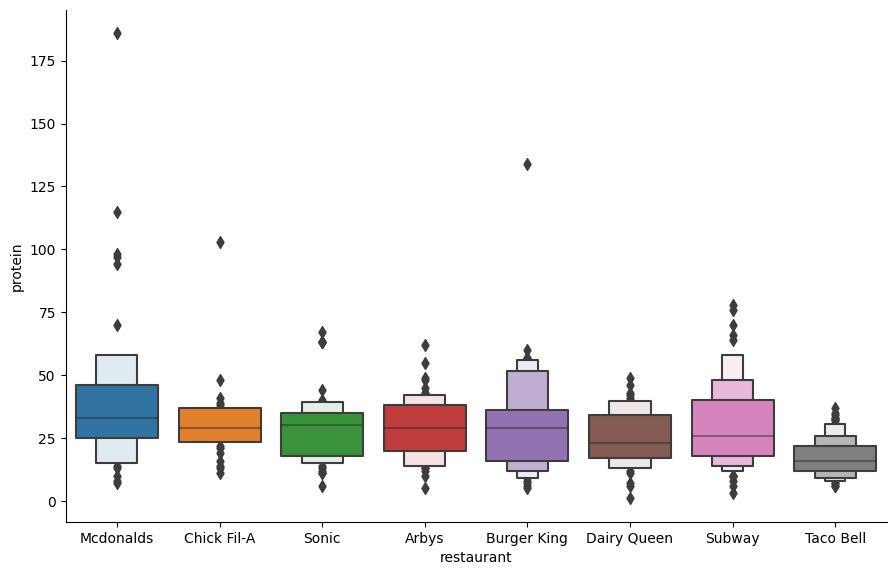

In [37]:
fig = sns.catplot(x='restaurant', y='protein', kind="boxen",data=fastfood)
fig.fig.set_size_inches(10,6)
plt.show()

- 단백질 평균값은 맥도날드가 높긴하다
- 하지만 칼로리를 생각했을 때 맥도날드의 제품을 골라야하는가 생각이듬
    - 위의 문제를 해결하기위해 성분들의 평균을 넣어 각 제품마다 영양성분비율의 Pie Chart 생각 가능
- 타코벨을 제외한 제품들의 단백질 평균은 비슷
- 하지만 박스를 비교해서 서브웨이가 단백질 함량 제품이 많은 것을 알 수 있음

## 탄수화물을 섭취해야하는데 단당류 비율이 적은 복합탄수화물이 먹고싶을 때

In [38]:
# total_carb / sugar 의 비율이 중요하다.

rate_carb_mean_res = fastfood[['total_carb','sugar','restaurant']].groupby(['restaurant']).mean()

rate_carb_mean_res

,total_carb,sugar
restaurant,,
Arbys,44.872727,7.563636
Burger King,39.314286,8.185714
Chick Fil-A,28.629630,4.148148
Dairy Queen,38.690476,6.357143
Mcdonalds,48.789474,11.070175
Sonic,47.207547,6.528302
Subway,54.718750,10.093750
Taco Bell,46.634783,3.704348


In [39]:
# column 추가

rate_carb_mean_res['rateCarb'] = rate_carb_mean_res['total_carb'] /  rate_carb_mean_res['sugar']

rate_carb_mean_res

,total_carb,sugar,rateCarb
restaurant,,,
Arbys,44.872727,7.563636,5.932692
Burger King,39.314286,8.185714,4.802792
Chick Fil-A,28.629630,4.148148,6.901786
Dairy Queen,38.690476,6.357143,6.086142
Mcdonalds,48.789474,11.070175,4.407290
Sonic,47.207547,6.528302,7.231214
Subway,54.718750,10.093750,5.421053
Taco Bell,46.634783,3.704348,12.589202


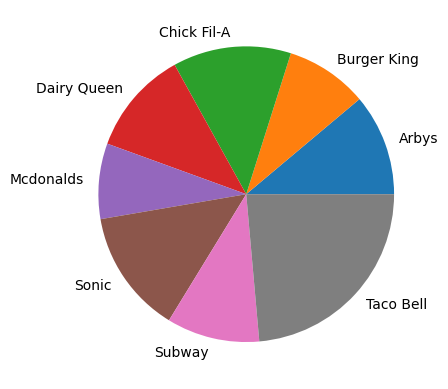

In [40]:
plt.pie(rate_carb_mean_res['rateCarb'], labels=rate_carb_mean_res.index)

plt.show()

- 타코벨이 압도적으로 단당류가 적어서 복합 탄수화물 섭취에 용이한 것을 알 수 있다